Exploratory data analysis is the lifeblood of every meaningful machine learning project. It helps us unravel the nature of the data and sometimes informs how you go about modeling. A careful exploration of the data encapsulates checking all available features, checking their interactions and correlation as well as their variability with respect to the target. 

In this task, you seek to explore the behaviour of customers in the various stores. Our goal is to check how some measures such as promos and opening of new stores affect purchasing behavior. 

To achieve this goal, you need to first clean the data. The data cleaning process will involve building pipelines to detect and handle outlier and missing data. This is particularly important because you don’t want to skew our analysis. 

Visualizing various features and interactions is necessary for clearly communicating our findings. It is a powerful tool in the data science toolbox. Communicate the findings below via the necessary plots.


In [1]:
import warnings
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("..")
warnings.filterwarnings('ignore')
from Scripts.Data_cleaning import load_data,clean_data
from Scripts.data_visualization import Data_visualiz

###### Load datasets

In [2]:
train = load_data('../data/train-data.csv')
test = load_data('../data/test-data.csv')

In [3]:
train.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,Days,months,Years,DayOfYear,WeekOfYear
0,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,555.0,1,1,0,1,31,7,2015,212,31
1,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,546.0,1,1,0,1,30,7,2015,211,31
2,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,523.0,1,1,0,1,29,7,2015,210,31
3,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,560.0,1,1,0,1,28,7,2015,209,31
4,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,612.0,1,1,0,1,27,7,2015,208,31


In [4]:
test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Open,Promo,StateHoliday,SchoolHoliday,Days,months,Years,DayOfYear,WeekOfYear
0,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-17,1.0,1.0,0,0.0,17.0,9.0,2015.0,260.0,38.0
1,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-16,1.0,1.0,0,0.0,16.0,9.0,2015.0,259.0,38.0
2,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-15,1.0,1.0,0,0.0,15.0,9.0,2015.0,258.0,38.0
3,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-14,1.0,1.0,0,0.0,14.0,9.0,2015.0,257.0,38.0
4,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-13,0.0,0.0,0,0.0,13.0,9.0,2015.0,256.0,37.0


In [5]:
clean_data(train).convert_to_datetime(train,['Date'])
clean_data(test).convert_to_datetime(test,['Date'])


In [6]:
D = Data_visualiz()

##### Graphical analysis

###### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

###### distribution for train 

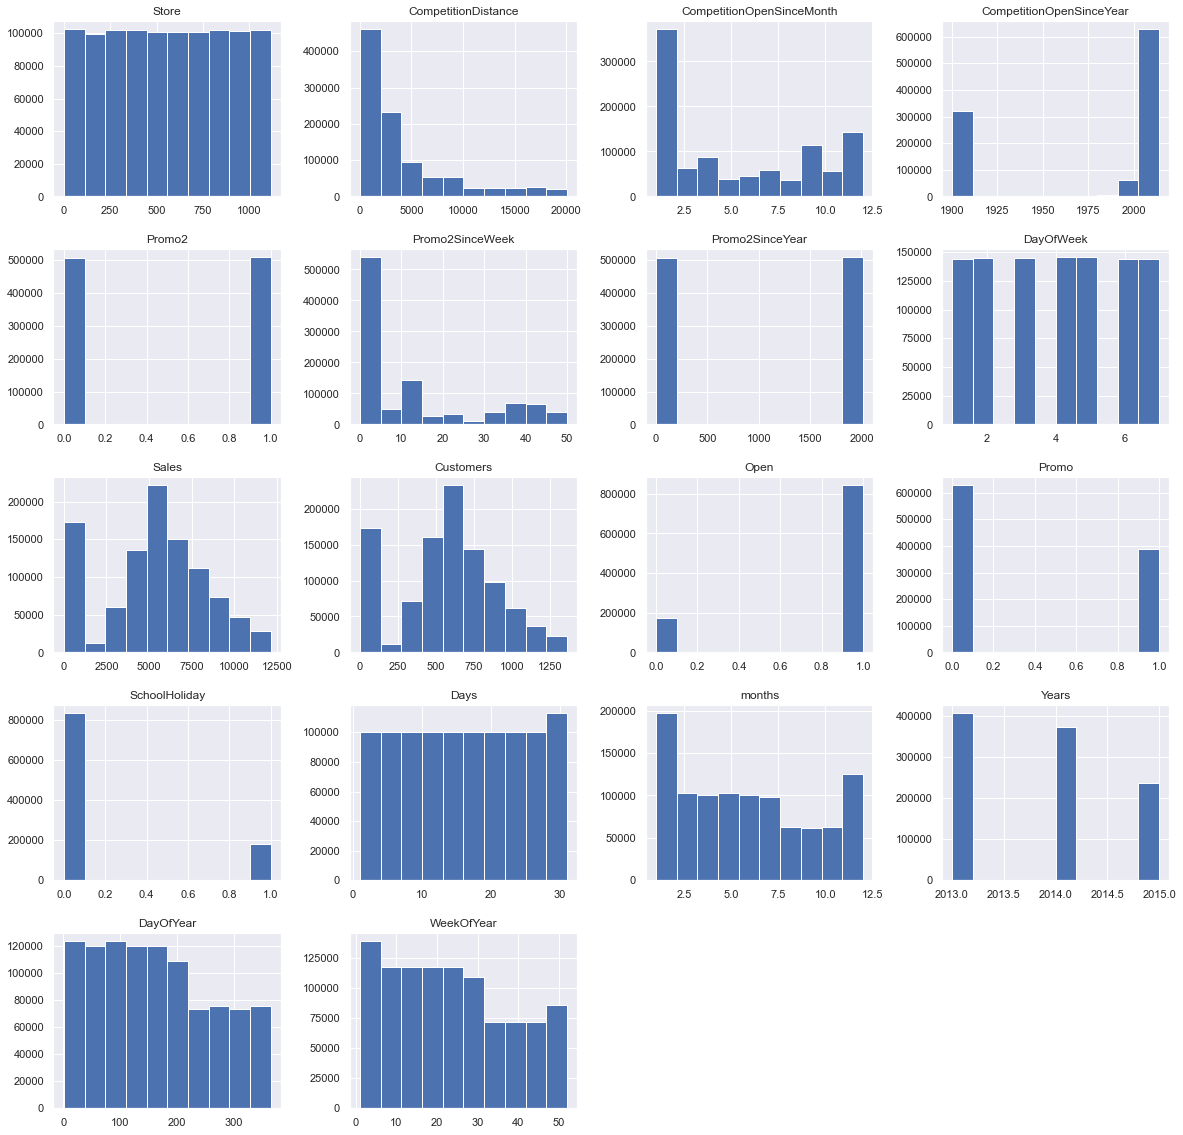

In [7]:
D.histogram(train)

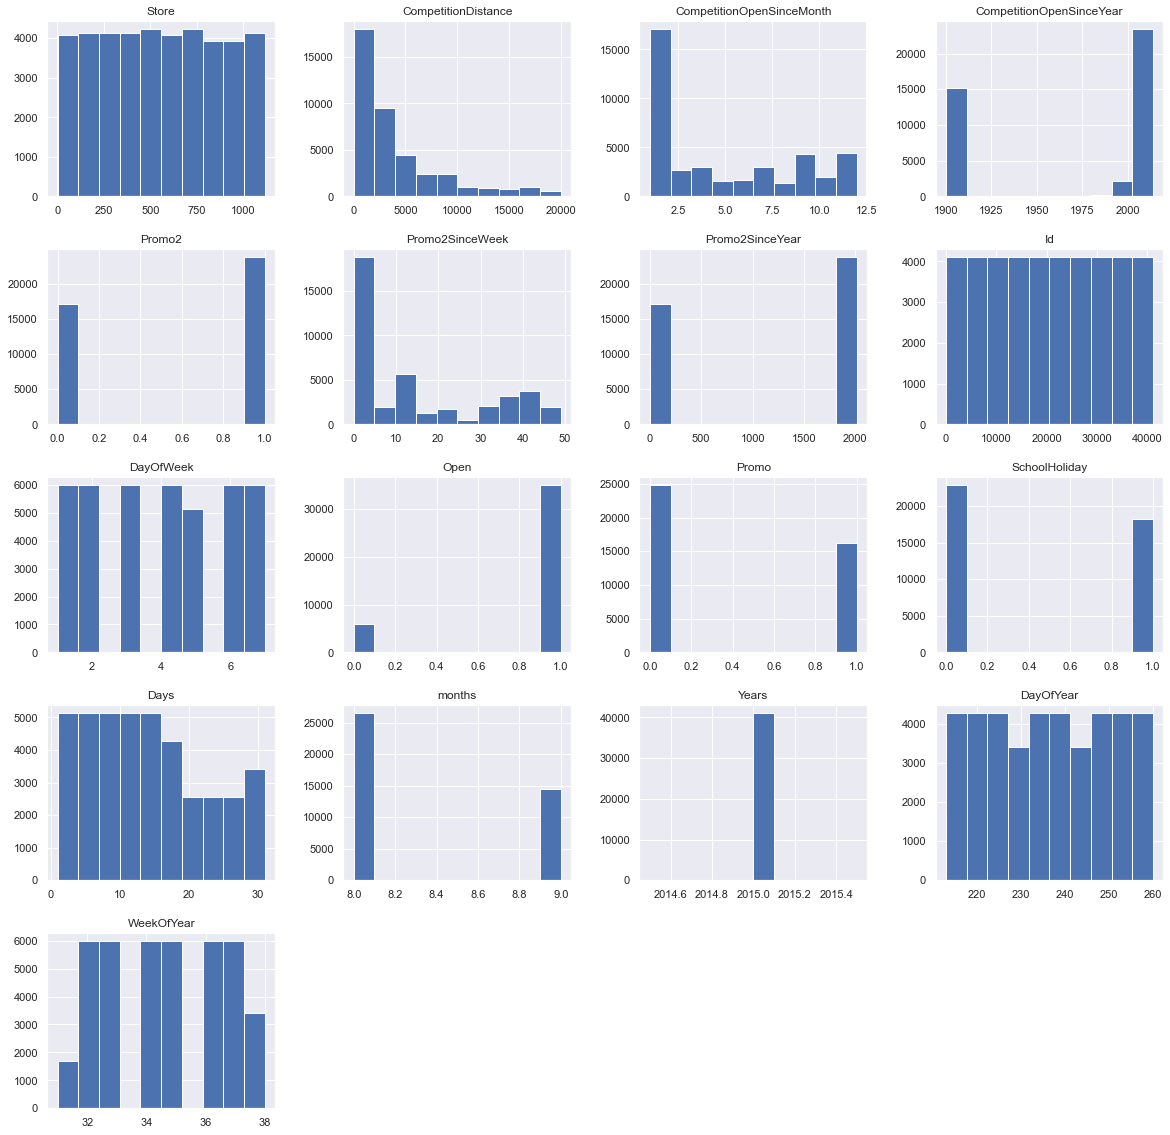

In [8]:
D.histogram(test)

###### Timeseries  

###### Find out any seasonal (Christmas, Easter etc) purchase behaviours,


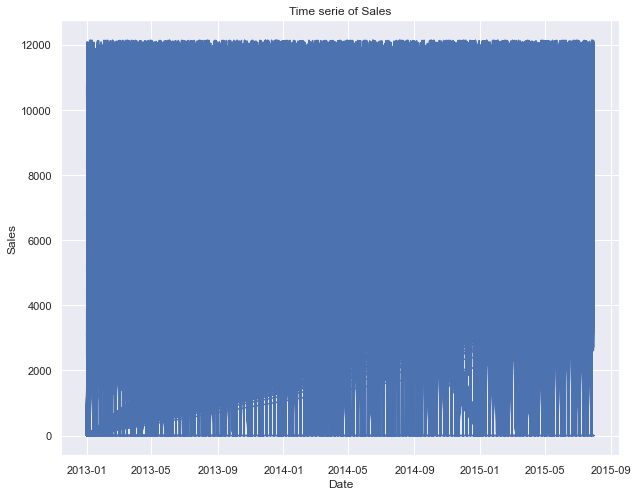

In [9]:
D.plot(train,'Date','Sales')

Due a huge number of data point in our train data, we are going to resample by month so that we can interprete it appropriately 

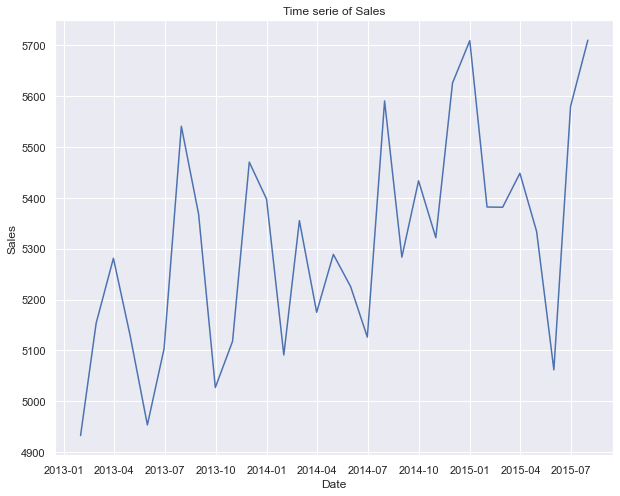

In [10]:
# resampling the dataset by month 
df_ = train.set_index('Date')
df_ = df_.resample('M').mean().reset_index()
D.plot(df_,'Date','Sales');

###### Scatter plot

###### What can you say about the correlation between sales and number of customers?

analysing the relationship between number of customers and sales 

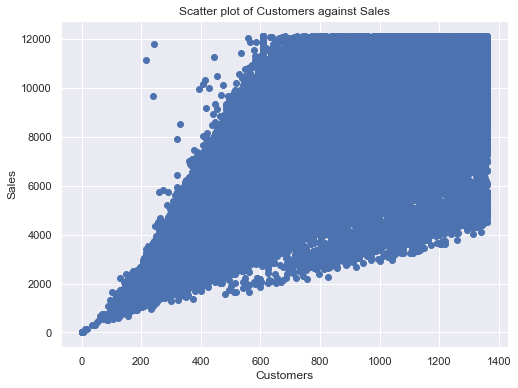

In [11]:
D.plot_counts(train,'Customers','Sales',Type = 'bivariate_scatter')

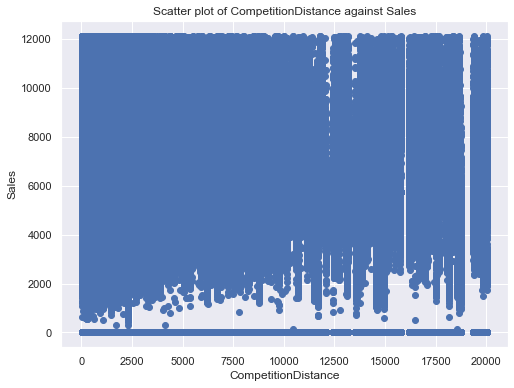

In [12]:
D.plot_counts(train,'CompetitionDistance','Sales',Type = 'bivariate_scatter')

There is a positive trend between customers and sales 

In [13]:
train['Promo'].unique()

array([1, 0], dtype=int64)

##### non-graphical analysis

Analysing the sales behavoir in holidays and non holidays

###### Check & compare sales behavior before, during and after holidays

In [14]:
#non holidays
df_holiday = train[train['StateHoliday'] != '0']
df_holiday.describe()['Sales']

count    30966.000000
mean       181.542046
std       1133.434358
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      12129.000000
Name: Sales, dtype: float64

In [15]:
#holidays 
df_non_holidays = train[train['StateHoliday'] == '0']
df_non_holidays.describe()['Sales']

count    983601.000000
mean       5464.998580
std        3015.494267
min           0.000000
25%        3971.000000
50%        5744.000000
75%        7425.000000
max       12137.000000
Name: Sales, dtype: float64

###### Analysing the effect of promo on the customers 

##### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


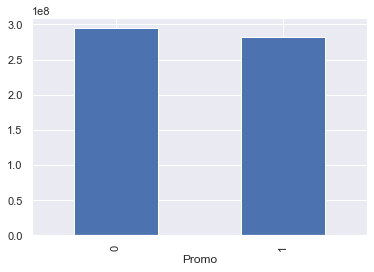

In [16]:
train.groupby('Promo').sum()['Customers'].plot(kind='bar');

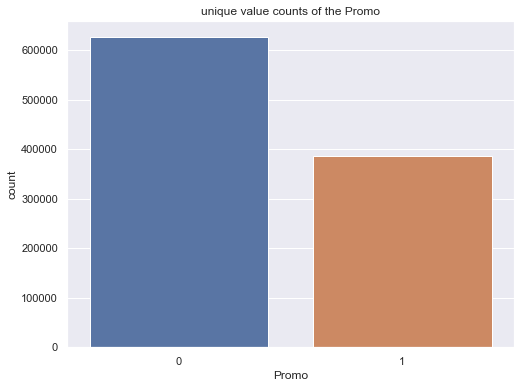

In [17]:
D.plot_counts(train,'Promo',Type = 'univariate')

it can be seen that, the promotion affects sales, since we have few number of counts of promotion(1) comparing to non promotion day(0) but sales seems to be equal 

###### analysing effect of assortment on sales  

###### Check how the assortment type affects sales 

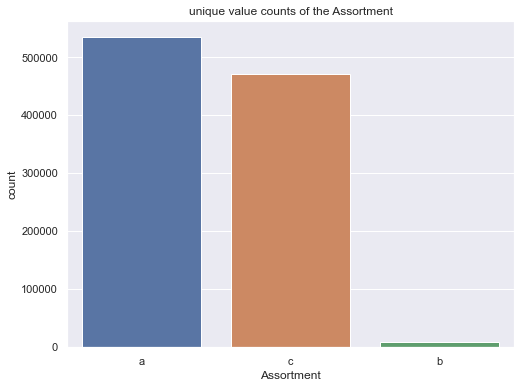

In [18]:
D.plot_counts(train,'Assortment',Type = 'univariate')

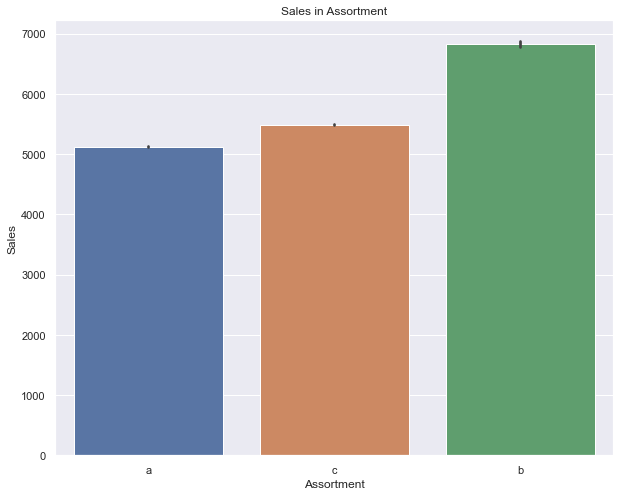

In [19]:
D.plot_counts(train,'Assortment','Sales',Type='bar')

As shown on the above two graphs that the Assortment B(extra) has high sales though it counts low comparing to others 

##### analysing stores

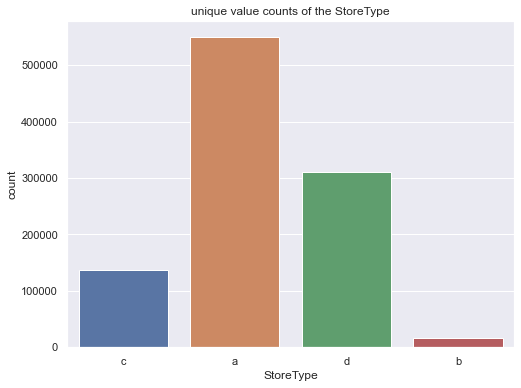

In [20]:
D.plot_counts(train,'StoreType',Type = 'univariate')

##### Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [21]:
train['Days of the week'] = train['Date'].dt.dayofweek
mask = train[(train['Days of the week'].isin([0,1,2,3,4])) & train['Open']==1]
mask[mask['StoreType'] == 'a']['Days of the week'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

store a is opened all weekdays

In [22]:
mask[mask['StoreType'] == 'b']['Days of the week'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

store b is also opened all weekdays

In [23]:
mask[mask['StoreType'] == 'c']['Days of the week'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [24]:
mask[mask['StoreType'] == 'd']['Days of the week'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

it seems all stocks open in all weekdays 

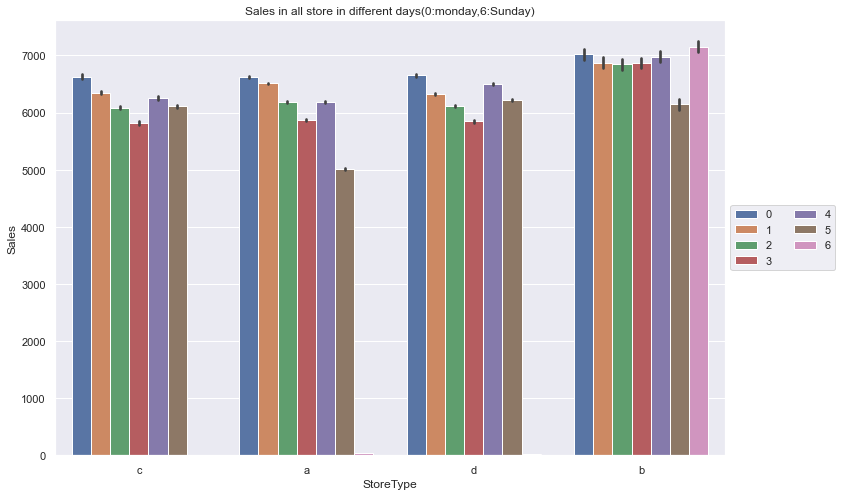

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x=train['StoreType'],y=train['Sales'],hue=train['Days of the week'])
plt.title('Sales in all store in different days(0:monday,6:Sunday)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=2);

Most of the stock, their sales significantly decrease on sunday 

#### stakeholidays vs sales 

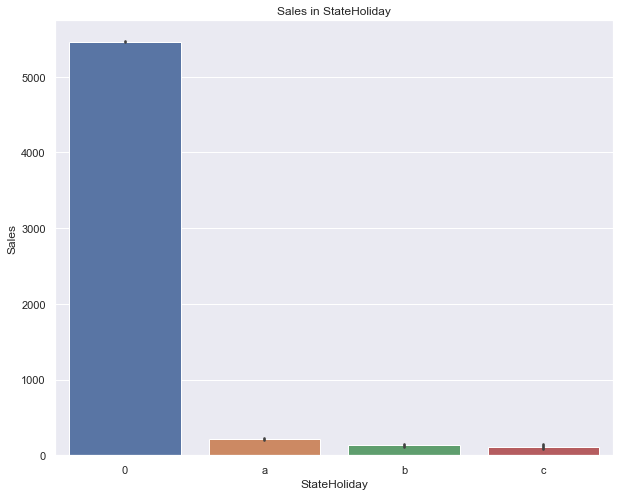

In [26]:
D.plot_counts(train,'StateHoliday','Sales',Type='bar')

sales decrease on the stakeholidays 

##### stakeholidays vs customers

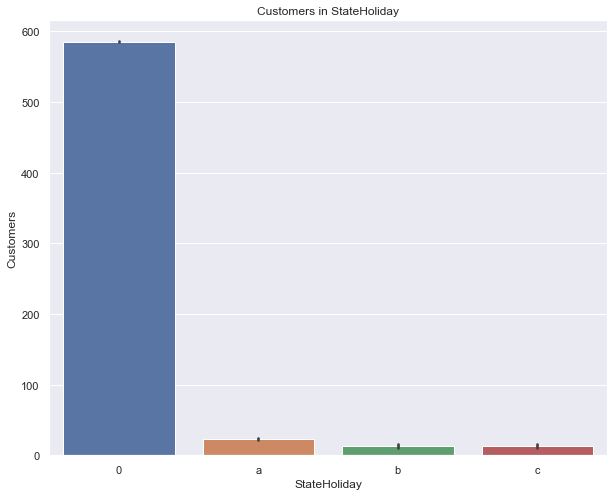

In [27]:
D.plot_counts(train,'StateHoliday','Customers',Type='bar')

stateholidays decrease customers 

#### analysing stateholidays 

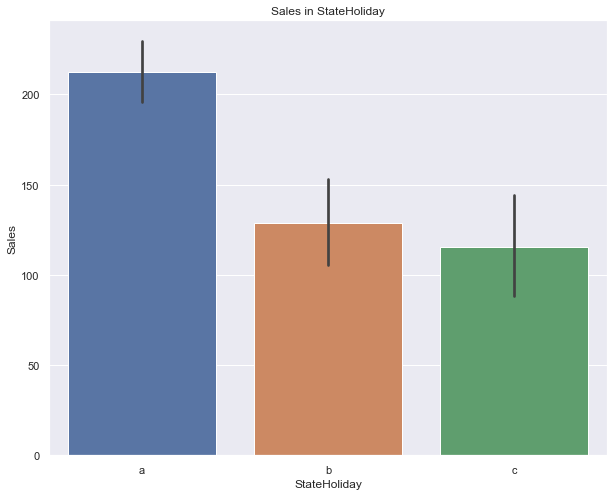

In [28]:
D.plot_counts(df_holiday,'StateHoliday','Sales',Type='bar')

on the public holiday, the sales are high compared to other holidays

#### analysing trends of sales in different months across all stores

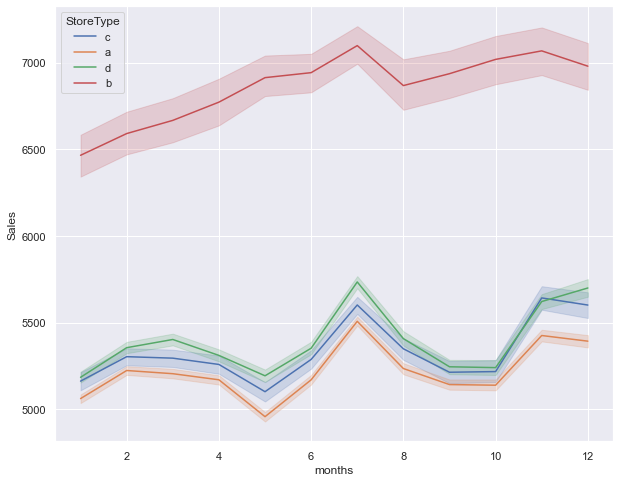

In [33]:
D.plot_counts(train,'months','Sales','StoreType',Type='lineplot')

###### analysing trends of sales in different months per promo

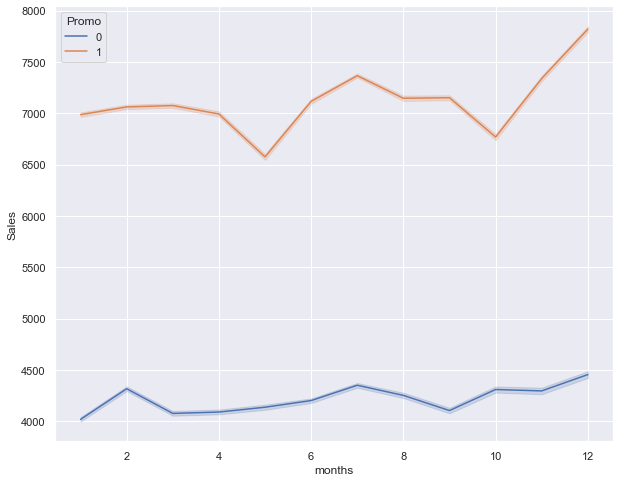

In [32]:
D.plot_counts(train,'months','Sales','Promo',Type ='lineplot')